📊 E-Commerce Sales and Customer Behavior Analysis
🔄 Generating datasets...
✅ Generated 5000 customers
✅ Generated 500 products
✅ Generated 25000 orders
✅ Generated 5000 behavior records

📊 Customers Dataset Overview
----------------------------------------
Shape: (5000, 10)
Columns: ['customer_id', 'first_name', 'last_name', 'email', 'registration_date', 'birth_date', 'gender', 'country', 'customer_segment', 'lifetime_value']
Missing values: 0
Data types:
customer_id                  object
first_name                   object
last_name                    object
email                        object
registration_date    datetime64[ns]
birth_date           datetime64[ns]
gender                       object
country                      object
customer_segment             object
lifetime_value              float64
dtype: object

First 3 rows:
  customer_id first_name last_name                email registration_date  \
0      C00001  Customer1     Last1  customer1@email.com        2024-10-16 

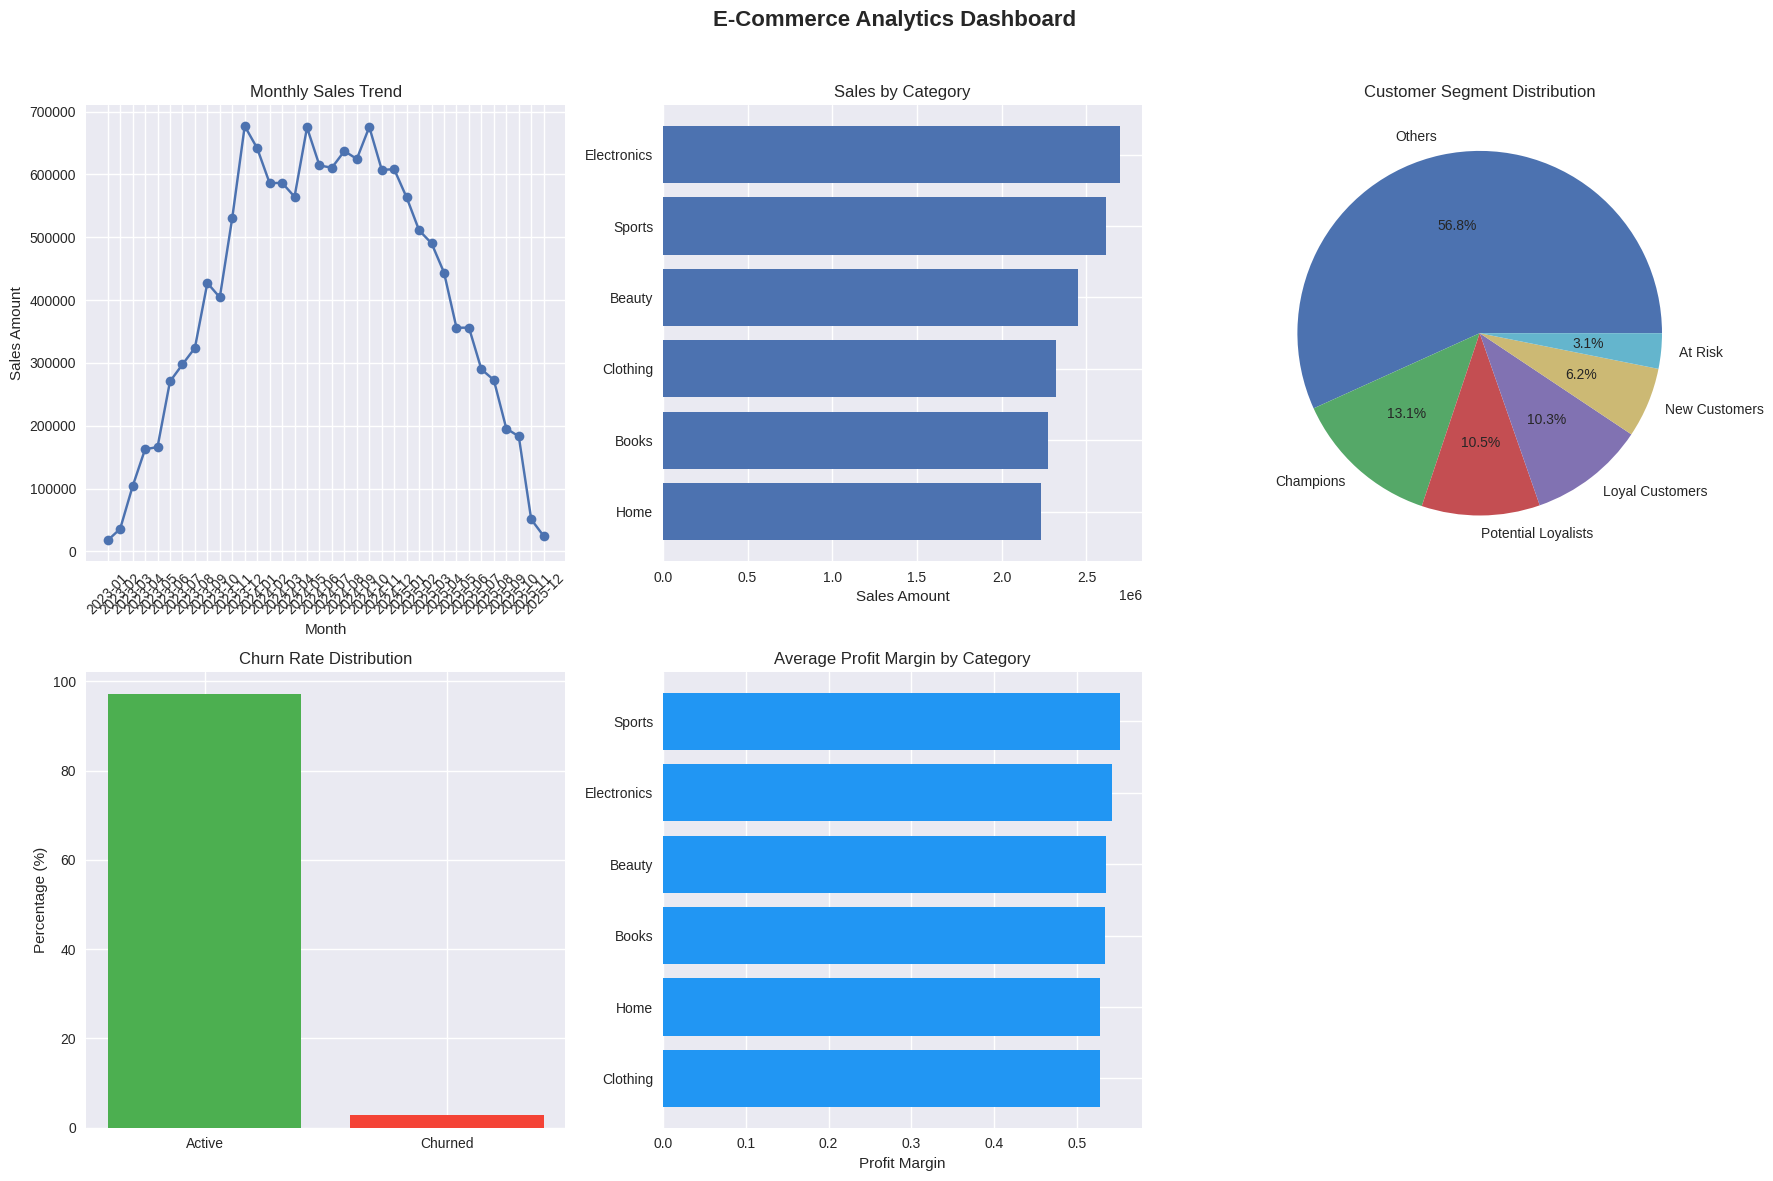

In [2]:
# E-Commerce Sales and Customer Behavior Analysis - Complete Implementation
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

# Statistical libraries
from scipy import stats
import statsmodels.api as sm

# Visualization libraries
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

print("📊 E-Commerce Sales and Customer Behavior Analysis")
print("=" * 60)

# =============================================================================
# PART 1: DATA GENERATION
# =============================================================================

class ECommerceDataGenerator:
    """Generate realistic e-commerce dataset"""

    def __init__(self, n_customers=5000, n_products=500, n_orders=25000):
        self.n_customers = n_customers
        self.n_products = n_products
        self.n_orders = n_orders

    def generate_customers(self):
        """Generate customer data"""
        countries = ['USA', 'UK', 'Germany', 'France', 'Canada', 'Australia', 'Japan', 'Brazil']
        segments = ['Premium', 'Standard', 'Budget']

        customers = []
        for i in range(self.n_customers):
            reg_date = datetime(2023, 1, 1) + timedelta(days=random.randint(0, 730))
            birth_date = datetime(1960, 1, 1) + timedelta(days=random.randint(0, 20000))

            customer = {
                'customer_id': f'C{i+1:05d}',
                'first_name': f'Customer{i+1}',
                'last_name': f'Last{i+1}',
                'email': f'customer{i+1}@email.com',
                'registration_date': reg_date,
                'birth_date': birth_date,
                'gender': random.choice(['M', 'F']),
                'country': random.choice(countries),
                'customer_segment': random.choice(segments),
                'lifetime_value': round(random.uniform(100, 5000), 2)
            }
            customers.append(customer)

        return pd.DataFrame(customers)

    def generate_products(self):
        """Generate product data"""
        categories = ['Electronics', 'Clothing', 'Home', 'Books', 'Sports', 'Beauty']
        brands = ['BrandA', 'BrandB', 'BrandC', 'BrandD', 'BrandE']

        products = []
        for i in range(self.n_products):
            category = random.choice(categories)
            cost_price = round(random.uniform(10, 500), 2)

            product = {
                'product_id': f'P{i+1:05d}',
                'product_name': f'{category} Product {i+1}',
                'category': category,
                'brand': random.choice(brands),
                'cost_price': cost_price,
                'unit_price': round(cost_price * random.uniform(1.5, 3.0), 2),
                'weight': round(random.uniform(0.1, 5.0), 2),
                'launch_date': datetime(2023, 1, 1) + timedelta(days=random.randint(0, 365))
            }
            products.append(product)

        return pd.DataFrame(products)

    def generate_orders(self, customers_df, products_df):
        """Generate order data"""
        orders = []
        order_id = 1

        for _, customer in customers_df.iterrows():
            # Number of orders per customer based on segment
            if customer['customer_segment'] == 'Premium':
                n_orders = random.randint(10, 30)
            elif customer['customer_segment'] == 'Standard':
                n_orders = random.randint(3, 15)
            else:  # Budget
                n_orders = random.randint(1, 8)

            for _ in range(n_orders):
                if order_id > self.n_orders:
                    break

                order_date = customer['registration_date'] + timedelta(days=random.randint(0, 365))
                product = products_df.sample(1).iloc[0]
                quantity = random.randint(1, 5)

                order = {
                    'order_id': f'O{order_id:06d}',
                    'customer_id': customer['customer_id'],
                    'product_id': product['product_id'],
                    'order_date': order_date,
                    'quantity': quantity,
                    'unit_price': product['unit_price'],
                    'total_amount': round(quantity * product['unit_price'], 2),
                    'shipping_cost': round(random.uniform(5, 25), 2),
                    'discount_applied': round(random.uniform(0, 20), 2),
                    'payment_method': random.choice(['Credit Card', 'PayPal', 'Bank Transfer']),
                    'order_status': random.choice(['Completed', 'Pending', 'Cancelled'])
                }
                orders.append(order)
                order_id += 1

        return pd.DataFrame(orders)

    def generate_customer_behavior(self, customers_df):
        """Generate customer behavior data"""
        behavior = []

        for _, customer in customers_df.iterrows():
            last_login = datetime.now() - timedelta(days=random.randint(0, 90))

            behavior_data = {
                'customer_id': customer['customer_id'],
                'last_login': last_login,
                'page_views': random.randint(10, 500),
                'time_on_site': round(random.uniform(5, 120), 2),
                'cart_abandonment_rate': round(random.uniform(0, 0.8), 2),
                'email_open_rate': round(random.uniform(0.1, 0.9), 2),
                'support_tickets': random.randint(0, 10),
                'review_count': random.randint(0, 50),
                'average_rating': round(random.uniform(1, 5), 1)
            }
            behavior.append(behavior_data)

        return pd.DataFrame(behavior)

# Generate datasets
print("🔄 Generating datasets...")
generator = ECommerceDataGenerator()

customers_df = generator.generate_customers()
products_df = generator.generate_products()
orders_df = generator.generate_orders(customers_df, products_df)
behavior_df = generator.generate_customer_behavior(customers_df)

print(f"✅ Generated {len(customers_df)} customers")
print(f"✅ Generated {len(products_df)} products")
print(f"✅ Generated {len(orders_df)} orders")
print(f"✅ Generated {len(behavior_df)} behavior records")

# =============================================================================
# PART 2: DATA EXPLORATION AND CLEANING
# =============================================================================

class DataExplorer:
    """Data exploration and cleaning utilities"""

    @staticmethod
    def explore_dataset(df, name):
        """Explore dataset basic information"""
        print(f"\n📊 {name} Dataset Overview")
        print("-" * 40)
        print(f"Shape: {df.shape}")
        print(f"Columns: {list(df.columns)}")
        print(f"Missing values: {df.isnull().sum().sum()}")
        print(f"Data types:\n{df.dtypes}")
        print(f"\nFirst 3 rows:\n{df.head(3)}")
        return df.describe()

    @staticmethod
    def clean_data(customers_df, products_df, orders_df, behavior_df):
        """Clean and prepare data"""
        print("\n🔧 Cleaning data...")

        # Convert date columns
        customers_df['registration_date'] = pd.to_datetime(customers_df['registration_date'])
        customers_df['birth_date'] = pd.to_datetime(customers_df['birth_date'])
        orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])
        behavior_df['last_login'] = pd.to_datetime(behavior_df['last_login'])

        # Calculate age
        customers_df['age'] = (datetime.now() - customers_df['birth_date']).dt.days // 365

        # Filter completed orders only
        orders_df = orders_df[orders_df['order_status'] == 'Completed'].copy()

        # Calculate net amount (after discount)
        orders_df['net_amount'] = orders_df['total_amount'] - orders_df['discount_applied']

        # Add profit calculation
        orders_df = orders_df.merge(products_df[['product_id', 'cost_price']], on='product_id')
        orders_df['profit'] = (orders_df['unit_price'] - orders_df['cost_price']) * orders_df['quantity']

        print("✅ Data cleaning completed")
        return customers_df, products_df, orders_df, behavior_df

# Explore datasets
explorer = DataExplorer()
explorer.explore_dataset(customers_df, "Customers")
explorer.explore_dataset(products_df, "Products")
explorer.explore_dataset(orders_df, "Orders")
explorer.explore_dataset(behavior_df, "Behavior")

# Clean data
customers_df, products_df, orders_df, behavior_df = explorer.clean_data(
    customers_df, products_df, orders_df, behavior_df
)

# =============================================================================
# PART 3: PROFITABILITY ANALYSIS
# =============================================================================

class ProfitabilityAnalyzer:
    """Analyze profitability across different dimensions"""

    def __init__(self, orders_df, products_df, customers_df):
        self.orders_df = orders_df
        self.products_df = products_df
        self.customers_df = customers_df

    def product_profitability(self):
        """Analyze product profitability"""
        print("\n💰 Product Profitability Analysis")
        print("-" * 40)

        # Product performance metrics
        product_metrics = self.orders_df.groupby('product_id').agg({
            'quantity': 'sum',
            'total_amount': 'sum',
            'profit': 'sum',
            'order_id': 'count'
        }).rename(columns={'order_id': 'order_count'})

        # Merge with product details
        product_metrics = product_metrics.merge(
            self.products_df[['product_id', 'product_name', 'category', 'brand']],
            on='product_id'
        )

        # Calculate profitability metrics
        product_metrics['profit_margin'] = product_metrics['profit'] / product_metrics['total_amount']
        product_metrics['avg_order_value'] = product_metrics['total_amount'] / product_metrics['order_count']

        # Top profitable products
        top_products = product_metrics.nlargest(10, 'profit')
        print("Top 10 Most Profitable Products:")
        print(top_products[['product_name', 'category', 'profit', 'profit_margin']].round(2))

        return product_metrics

    def category_analysis(self):
        """Analyze category performance"""
        print("\n📊 Category Performance Analysis")
        print("-" * 40)

        # Category metrics
        category_metrics = self.orders_df.merge(
            self.products_df[['product_id', 'category']], on='product_id'
        ).groupby('category').agg({
            'total_amount': 'sum',
            'profit': 'sum',
            'quantity': 'sum',
            'order_id': 'count'
        }).rename(columns={'order_id': 'order_count'})

        category_metrics['profit_margin'] = category_metrics['profit'] / category_metrics['total_amount']
        category_metrics = category_metrics.sort_values('profit', ascending=False)

        print("Category Performance:")
        print(category_metrics.round(2))

        return category_metrics

    def customer_segmentation(self):
        """RFM Analysis for customer segmentation"""
        print("\n👥 Customer Segmentation (RFM Analysis)")
        print("-" * 40)

        # Calculate RFM metrics
        current_date = self.orders_df['order_date'].max()

        rfm = self.orders_df.groupby('customer_id').agg({
            'order_date': lambda x: (current_date - x.max()).days,  # Recency
            'order_id': 'count',  # Frequency
            'total_amount': 'sum'  # Monetary
        }).rename(columns={
            'order_date': 'recency',
            'order_id': 'frequency',
            'total_amount': 'monetary'
        })

        # Calculate RFM scores
        rfm['r_score'] = pd.qcut(rfm['recency'].rank(method='first'), 5, labels=[5,4,3,2,1])
        rfm['f_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
        rfm['m_score'] = pd.qcut(rfm['monetary'].rank(method='first'), 5, labels=[1,2,3,4,5])

        # Combine RFM scores
        rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)

        # Segment customers
        def segment_customers(row):
            if row['rfm_score'] in ['555', '554', '544', '545', '454', '455', '445']:
                return 'Champions'
            elif row['rfm_score'] in ['543', '444', '435', '355', '354', '345', '344', '335']:
                return 'Loyal Customers'
            elif row['rfm_score'] in ['512', '511', '422', '421', '412', '411', '311']:
                return 'Potential Loyalists'
            elif row['rfm_score'] in ['533', '532', '531', '523', '522', '521', '515', '514']:
                return 'New Customers'
            elif row['rfm_score'] in ['155', '154', '144', '214', '215', '115', '114']:
                return 'At Risk'
            else:
                return 'Others'

        rfm['segment'] = rfm.apply(segment_customers, axis=1)

        # Segment analysis
        segment_analysis = rfm.groupby('segment').agg({
            'recency': 'mean',
            'frequency': 'mean',
            'monetary': 'mean'
        }).round(2)

        print("Customer Segments:")
        print(segment_analysis)

        return rfm

# Perform profitability analysis
profitability = ProfitabilityAnalyzer(orders_df, products_df, customers_df)
product_metrics = profitability.product_profitability()
category_metrics = profitability.category_analysis()
rfm_analysis = profitability.customer_segmentation()

# =============================================================================
# PART 4: CHURN PREDICTION MODEL
# =============================================================================

class ChurnPredictor:
    """Build customer churn prediction model"""

    def __init__(self, orders_df, customers_df, behavior_df):
        self.orders_df = orders_df
        self.customers_df = customers_df
        self.behavior_df = behavior_df

    def prepare_features(self):
        """Prepare features for churn prediction"""
        print("\n🔮 Preparing Churn Prediction Features")
        print("-" * 40)

        # Customer purchase behavior
        current_date = self.orders_df['order_date'].max()
        customer_features = self.orders_df.groupby('customer_id').agg({
            'order_date': [
                lambda x: (current_date - x.max()).days,  # Days since last order
                lambda x: (current_date - x.min()).days,  # Customer tenure
                'count'  # Total orders
            ],
            'total_amount': ['sum', 'mean', 'std'],
            'quantity': ['sum', 'mean'],
            'profit': ['sum', 'mean']
        }).round(2)

        # Flatten column names
        customer_features.columns = [
            'days_since_last_order', 'customer_tenure', 'total_orders',
            'total_spent', 'avg_order_value', 'std_order_value',
            'total_quantity', 'avg_quantity', 'total_profit', 'avg_profit'
        ]

        # Fill NaN values
        customer_features['std_order_value'] = customer_features['std_order_value'].fillna(0)

        # Merge with customer demographics
        customer_features = customer_features.merge(
            self.customers_df[['customer_id', 'customer_segment', 'age', 'country']],
            on='customer_id', how='left'
        )

        # Merge with behavior data
        customer_features = customer_features.merge(
            self.behavior_df[['customer_id', 'page_views', 'time_on_site',
                            'cart_abandonment_rate', 'email_open_rate',
                            'support_tickets', 'review_count']],
            on='customer_id', how='left'
        )

        # Define churn (no order in last 60 days)
        customer_features['is_churned'] = (customer_features['days_since_last_order'] > 60).astype(int)

        print(f"Churn rate: {customer_features['is_churned'].mean():.2%}")

        return customer_features

    def build_model(self, features_df):
        """Build and train churn prediction model"""
        print("\n🤖 Building Churn Prediction Model")
        print("-" * 40)

        # Prepare features
        feature_columns = [
            'customer_tenure', 'total_orders', 'total_spent', 'avg_order_value',
            'total_quantity', 'avg_quantity', 'age', 'page_views', 'time_on_site',
            'cart_abandonment_rate', 'email_open_rate', 'support_tickets', 'review_count'
        ]

        # Handle missing values
        features_df[feature_columns] = features_df[feature_columns].fillna(0)

        # Encode categorical variables
        le_segment = LabelEncoder()
        le_country = LabelEncoder()

        features_df['segment_encoded'] = le_segment.fit_transform(features_df['customer_segment'])
        features_df['country_encoded'] = le_country.fit_transform(features_df['country'])

        feature_columns.extend(['segment_encoded', 'country_encoded'])

        # Prepare training data
        X = features_df[feature_columns]
        y = features_df['is_churned']

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train models
        models = {
            'Logistic Regression': LogisticRegression(random_state=42),
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
        }

        results = {}
        for name, model in models.items():
            # Train model
            if name == 'Logistic Regression':
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)
                y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
            else:
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                y_pred_proba = model.predict_proba(X_test)[:, 1]

            # Evaluate model
            auc_score = roc_auc_score(y_test, y_pred_proba)

            results[name] = {
                'model': model,
                'auc_score': auc_score,
                'predictions': y_pred,
                'probabilities': y_pred_proba
            }

            print(f"\n{name} Results:")
            print(f"AUC Score: {auc_score:.3f}")
            print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

        return results, X_test, y_test, feature_columns, scaler

# Build churn prediction model
churn_predictor = ChurnPredictor(orders_df, customers_df, behavior_df)
churn_features = churn_predictor.prepare_features()
churn_models, X_test, y_test, feature_columns, scaler = churn_predictor.build_model(churn_features)

# =============================================================================
# PART 5: DYNAMIC PRICING ANALYSIS
# =============================================================================

class PricingAnalyzer:
    """Analyze pricing strategies and elasticity"""

    def __init__(self, orders_df, products_df):
        self.orders_df = orders_df
        self.products_df = products_df

    def price_elasticity_analysis(self):
        """Calculate price elasticity for products"""
        print("\n💲 Price Elasticity Analysis")
        print("-" * 40)

        # Merge orders with products
        price_data = self.orders_df.merge(
            self.products_df[['product_id', 'category']], on='product_id'
        )

        # Calculate elasticity by category
        elasticity_results = {}

        for category in price_data['category'].unique():
            cat_data = price_data[price_data['category'] == category].copy()

            # Group by price ranges
            cat_data['price_range'] = pd.cut(cat_data['unit_price'], bins=5)
            price_demand = cat_data.groupby('price_range').agg({
                'quantity': 'sum',
                'unit_price': 'mean'
            }).dropna()

            if len(price_demand) > 1:
                # Calculate elasticity (% change in quantity / % change in price)
                price_changes = price_demand['unit_price'].pct_change().dropna()
                quantity_changes = price_demand['quantity'].pct_change().dropna()

                if len(price_changes) > 0 and len(quantity_changes) > 0:
                    elasticity = (quantity_changes / price_changes).mean()
                    elasticity_results[category] = elasticity

        print("Price Elasticity by Category:")
        for category, elasticity in elasticity_results.items():
            print(f"{category}: {elasticity:.2f}")

        return elasticity_results

    def optimal_pricing_recommendation(self):
        """Recommend optimal pricing strategies"""
        print("\n🎯 Optimal Pricing Recommendations")
        print("-" * 40)

        # Product performance analysis
        product_analysis = self.orders_df.groupby('product_id').agg({
            'unit_price': 'mean',
            'quantity': 'sum',
            'profit': 'sum',
            'total_amount': 'sum'
        })

        # Merge with product info
        product_analysis = product_analysis.merge(
            self.products_df[['product_id', 'category', 'cost_price']], on='product_id'
        )

        # Calculate metrics
        product_analysis['profit_margin'] = product_analysis['profit'] / product_analysis['total_amount']
        product_analysis['markup'] = (product_analysis['unit_price'] - product_analysis['cost_price']) / product_analysis['cost_price']

        # Pricing recommendations
        def pricing_recommendation(row):
            if row['profit_margin'] < 0.2:
                return 'Increase Price'
            elif row['profit_margin'] > 0.6:
                return 'Consider Decreasing Price'
            else:
                return 'Optimal Range'

        product_analysis['recommendation'] = product_analysis.apply(pricing_recommendation, axis=1)

        # Summary by category
        category_pricing = product_analysis.groupby('category').agg({
            'profit_margin': 'mean',
            'markup': 'mean',
            'quantity': 'sum'
        }).round(2)

        print("Pricing Analysis by Category:")
        print(category_pricing)

        return product_analysis

# Perform pricing analysis
pricing_analyzer = PricingAnalyzer(orders_df, products_df)
price_elasticity = pricing_analyzer.price_elasticity_analysis()
pricing_recommendations = pricing_analyzer.optimal_pricing_recommendation()

# =============================================================================
# PART 6: REGIONAL ANALYSIS
# =============================================================================

class RegionalAnalyzer:
    """Analyze regional performance and opportunities"""

    def __init__(self, orders_df, customers_df, products_df):
        self.orders_df = orders_df
        self.customers_df = customers_df
        self.products_df = products_df

    def regional_performance(self):
        """Analyze performance by region"""
        print("\n🌍 Regional Performance Analysis")
        print("-" * 40)

        # Regional sales data
        regional_data = self.orders_df.merge(
            self.customers_df[['customer_id', 'country']], on='customer_id'
        ).merge(
            self.products_df[['product_id', 'category']], on='product_id'
        )

        # Regional metrics
        regional_metrics = regional_data.groupby('country').agg({
            'total_amount': 'sum',
            'profit': 'sum',
            'quantity': 'sum',
            'customer_id': 'nunique',
            'order_id': 'count'
        }).rename(columns={'customer_id': 'unique_customers', 'order_id': 'total_orders'})

        # Calculate additional metrics
        regional_metrics['avg_order_value'] = regional_metrics['total_amount'] / regional_metrics['total_orders']
        regional_metrics['revenue_per_customer'] = regional_metrics['total_amount'] / regional_metrics['unique_customers']
        regional_metrics['profit_margin'] = regional_metrics['profit'] / regional_metrics['total_amount']

        regional_metrics = regional_metrics.sort_values('total_amount', ascending=False)

        print("Regional Performance Metrics:")
        print(regional_metrics.round(2))

        return regional_metrics

    def category_preferences_by_region(self):
        """Analyze category preferences by region"""
        print("\n📊 Category Preferences by Region")
        print("-" * 40)

        # Category preferences
        regional_categories = self.orders_df.merge(
            self.customers_df[['customer_id', 'country']], on='customer_id'
        ).merge(
            self.products_df[['product_id', 'category']], on='product_id'
        )

        # Calculate category share by region
        category_share = regional_categories.groupby(['country', 'category'])['total_amount'].sum().unstack(fill_value=0)
        category_share_pct = category_share.div(category_share.sum(axis=1), axis=0) * 100

        print("Category Share by Region (%):")
        print(category_share_pct.round(1))

        return category_share_pct

# Perform regional analysis
regional_analyzer = RegionalAnalyzer(orders_df, customers_df, products_df)
regional_performance = regional_analyzer.regional_performance()
category_preferences = regional_analyzer.category_preferences_by_region()

# =============================================================================
# PART 7: ADVANCED VISUALIZATIONS
# =============================================================================

class AdvancedVisualizer:
    """Create advanced visualizations for insights"""

    @staticmethod
    def create_dashboard_plots():
        """Create comprehensive dashboard plots"""
        print("\n📊 Creating Advanced Visualizations")
        print("-" * 40)

        # Set style
        plt.style.use('seaborn-v0_8')
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('E-Commerce Analytics Dashboard', fontsize=16, fontweight='bold')

        # 1. Sales Trend Over Time
        monthly_sales = orders_df.groupby(orders_df['order_date'].dt.to_period('M'))['total_amount'].sum()
        axes[0, 0].plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o')
        axes[0, 0].set_title('Monthly Sales Trend')
        axes[0, 0].set_xlabel('Month')
        axes[0, 0].set_ylabel('Sales Amount')
        axes[0, 0].tick_params(axis='x', rotation=45)

        # 2. Category Performance
        category_data = orders_df.merge(products_df[['product_id', 'category']], on='product_id')
        category_sales = category_data.groupby('category')['total_amount'].sum().sort_values(ascending=True)
        axes[0, 1].barh(category_sales.index, category_sales.values)
        axes[0, 1].set_title('Sales by Category')
        axes[0, 1].set_xlabel('Sales Amount')

        # 3. Customer Segment Distribution
        segment_counts = rfm_analysis['segment'].value_counts()
        axes[0, 2].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%')
        axes[0, 2].set_title('Customer Segment Distribution')

        # 4. Regional Performance
        regional_sales = orders_df.merge(customers_df[['customer_id', 'country']], on='customer_id')
        regional_totals = regional_sales.groupby('country')['total_amount'].sum().sort_values(ascending=True)
        axes

        # 5. Churn Rate Distribution
        churn_rate = churn_features['is_churned'].value_counts(normalize=True)
        axes[1, 0].bar(['Active', 'Churned'], churn_rate.values * 100, color=['#4CAF50', '#F44336'])
        axes[1, 0].set_title('Churn Rate Distribution')
        axes[1, 0].set_ylabel('Percentage (%)')

        # 6. Average Profit Margin by Category
        category_profit_margin = pricing_recommendations.groupby('category')['profit_margin'].mean().sort_values(ascending=True)
        axes[1, 1].barh(category_profit_margin.index, category_profit_margin.values, color='#2196F3')
        axes[1, 1].set_title('Average Profit Margin by Category')
        axes[1, 1].set_xlabel('Profit Margin')

        # Remove empty subplot (if axes[1,2] exists)
        fig.delaxes(axes[1, 2])

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

# Run the visualisation
AdvancedVisualizer.create_dashboard_plots()